# Used data is collected from one weather station at West Palm Beach airport. Data is daily level since Jan 1 2000.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from matplotlib import rcParams
import matplotlib.pylab as plb

rcParams['figure.figsize'] = 16, 9

In [2]:
df = pd.read_csv('PB_Climate_Data.csv')
df.head()

STATION                                          NAME      DATE   AWND  \
0  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/1/2000   6.49   
1  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/2/2000   6.49   
2  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/3/2000  10.51   
3  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/4/2000   8.50   
4  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/5/2000   9.40   

     FMTM    PGTM  PRCP  SNOW  SNWD  TAVG  ...  WT09  WT10  WT11  WT13  WT14  \
0  1300.0  1601.0   0.0   0.0   0.0  68.0  ...   NaN   NaN   NaN   1.0   NaN   
1  1205.0  1307.0   0.0   0.0   0.0  69.0  ...   NaN   NaN   NaN   NaN   NaN   
2  1055.0  1115.0   0.0   0.0   0.0  74.0  ...   NaN   NaN   NaN   NaN   NaN   
3  1425.0  1454.0   0.0   0.0   0.0  76.0  ...   NaN   NaN   NaN   NaN   NaN   
4  1532.0  1509.0   0.0   0.0   0.0  69.0  ...   NaN   NaN   NaN   NaN   NaN   

   WT16  WT18  WT21  WV03  WV20  
0   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN  
2   1.0   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN  
4   1.0   NaN   NaN   NaN   NaN  

[5 rows x 34 columns]

In [3]:
df.shape

(8064, 34)

In [4]:
df.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          2
FMTM       3716
PGTM       3865
PRCP          2
SNOW       7612
SNWD       7682
TAVG       2806
TMAX          1
TMIN          1
TSUN       6904
WDF2          1
WDF5         37
WESD       4046
WSF2          1
WSF5         37
WT01       5696
WT02       7931
WT03       6214
WT05       7696
WT07       8045
WT08       7550
WT09       8056
WT10       8047
WT11       8045
WT13       6743
WT14       8048
WT16       5676
WT18       8063
WT21       8062
WV03       8061
WV20       8062
dtype: int64

In [5]:
#Drop columns with all NaN values
df = df.dropna(axis='columns', how ='all')
df.isnull().sum().sum()

156708

In [6]:
df.head()

STATION                                          NAME      DATE   AWND  \
0  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/1/2000   6.49   
1  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/2/2000   6.49   
2  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/3/2000  10.51   
3  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/4/2000   8.50   
4  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/5/2000   9.40   

     FMTM    PGTM  PRCP  SNOW  SNWD  TAVG  ...  WT09  WT10  WT11  WT13  WT14  \
0  1300.0  1601.0   0.0   0.0   0.0  68.0  ...   NaN   NaN   NaN   1.0   NaN   
1  1205.0  1307.0   0.0   0.0   0.0  69.0  ...   NaN   NaN   NaN   NaN   NaN   
2  1055.0  1115.0   0.0   0.0   0.0  74.0  ...   NaN   NaN   NaN   NaN   NaN   
3  1425.0  1454.0   0.0   0.0   0.0  76.0  ...   NaN   NaN   NaN   NaN   NaN   
4  1532.0  1509.0   0.0   0.0   0.0  69.0  ...   NaN   NaN   NaN   NaN   NaN   

   WT16  WT18  WT21  WV03  WV20  
0   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN  
2   1.0   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN  
4   1.0   NaN   NaN   NaN   NaN  

[5 rows x 34 columns]

In [7]:
#Pick all the columns with less than 100 NaN samples
df = df.loc[:, (df.isna().sum() <100)]
df.head()

STATION                                          NAME      DATE   AWND  \
0  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/1/2000   6.49   
1  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/2/2000   6.49   
2  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/3/2000  10.51   
3  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/4/2000   8.50   
4  USW00012844  WEST PALM BEACH INTERNATIONAL AIRPORT, FL US  1/5/2000   9.40   

   PRCP  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5  
0   0.0  78.0  58.0   80.0   90.0  15.0  17.0  
1   0.0  78.0  59.0   90.0   90.0  15.0  17.0  
2   0.0  79.0  69.0  110.0  100.0  17.0  21.0  
3   0.0  81.0  70.0  140.0  140.0  17.9  21.0  
4   0.0  74.0  64.0   10.0   20.0  17.9  23.0

In [8]:
#Forward fill any NaN values
df.ffill(inplace=True)
df.isnull().sum().sum()

0

In [9]:
#Check data for any abnormal values
df.describe()

AWND         PRCP         TMAX         TMIN         WDF2  \
count  8064.000000  8064.000000  8064.000000  8064.000000  8064.000000   
mean      9.696608     0.162927    83.661830    68.941344   149.913194   
std      36.800506     0.495153     6.727771     9.190821    90.108826   
min       1.340000     0.000000    50.000000    32.000000    10.000000   
25%       6.490000     0.000000    80.000000    64.000000    90.000000   
50%       8.500000     0.000000    85.000000    72.000000   120.000000   
75%      11.410000     0.070000    89.000000    76.000000   202.500000   
max    3008.680000     8.790000    99.000000    85.000000   360.000000   

              WDF5         WSF2         WSF5  
count  8064.000000  8064.000000  8064.000000  
mean    149.181548    19.324702    24.203633  
std      90.381801     4.962490     6.512914  
min      10.000000     6.900000     8.100000  
25%      90.000000    16.100000    19.900000  
50%     130.000000    18.100000    23.000000  
75%     210.000000    21.900000    28.000000  
max     360.000000    83.000000   100.900000

In [10]:
#Drop AWND rows with speeds above 200mph
indexAge = df[df['AWND'] >= 200].index
df.drop(indexAge , inplace=True)

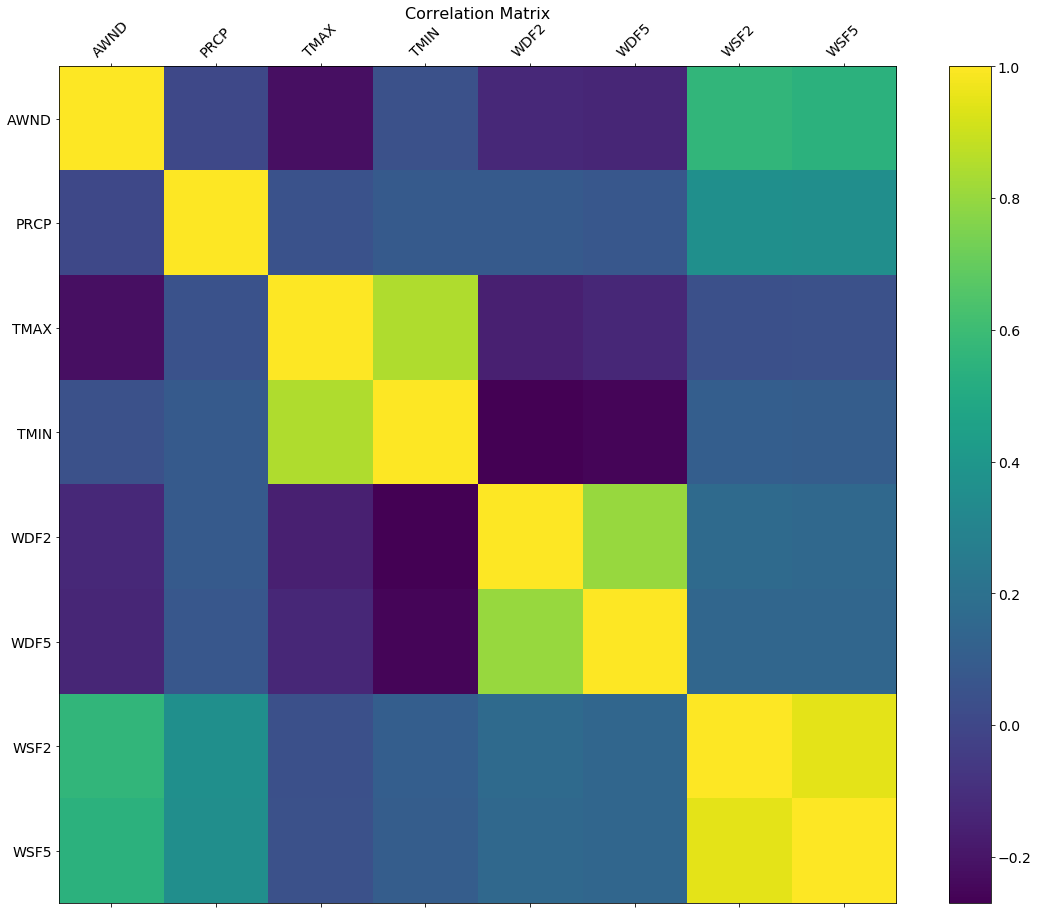

In [11]:
#Create correlation plot
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [12]:
#Create dictionaries for plot labeling
metadict = {'AWND':'Average Wind Speed (mph)', 'PRCP':'Precipitation (in)', 'TMAX':'Max Temp (F)', 
            'TMIN':'Min Temp (F)', 'WDF2':'Wind Direction F2 (deg)', 'WDF5':'Wind Direction F5 (deg)', 
            'WSF2':'Wind Speed F2 (mph)', 'WSF5':'WInd Speed F5 (mph)'}
metadictunits = {'AWND':'Speed (mph)', 'PRCP':'Precipitation (in)', 'TMAX':'Temp (F)', 
            'TMIN':'Temp (F)', 'WDF2':'Direction F2 (deg)', 'WDF5':'Direction F5 (deg)', 
            'WSF2':'Speed F2 (mph)', 'WSF5':'Speed F5 (mph)'}

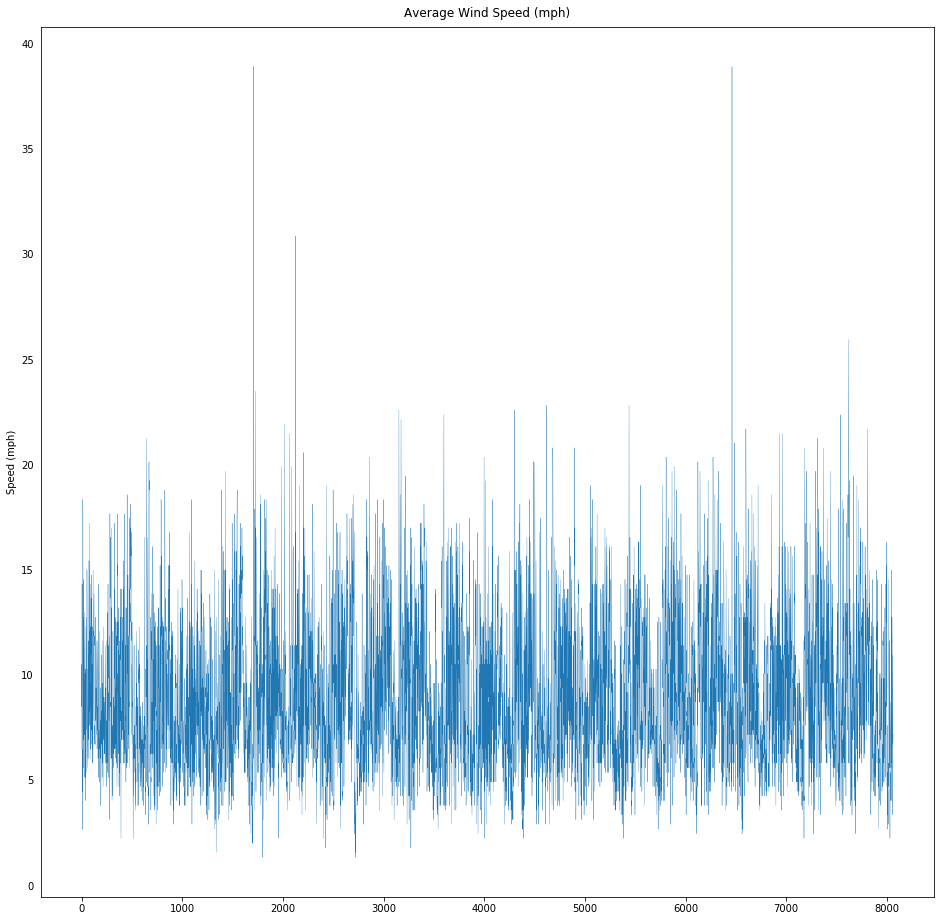

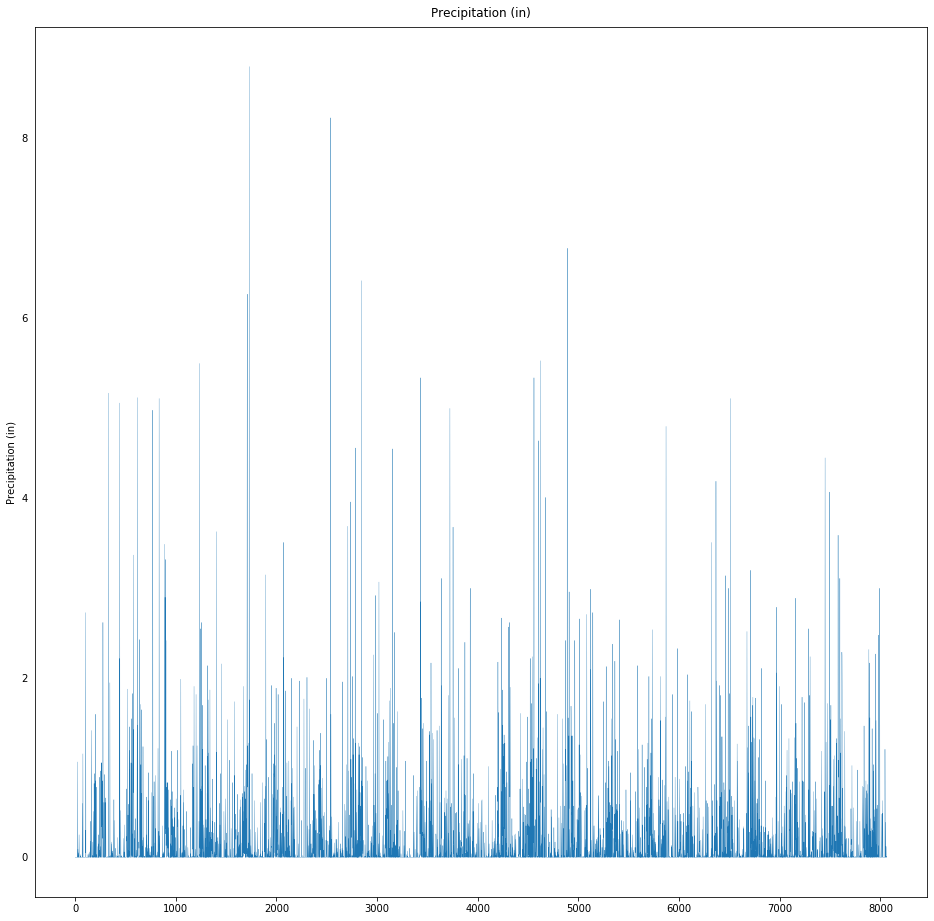

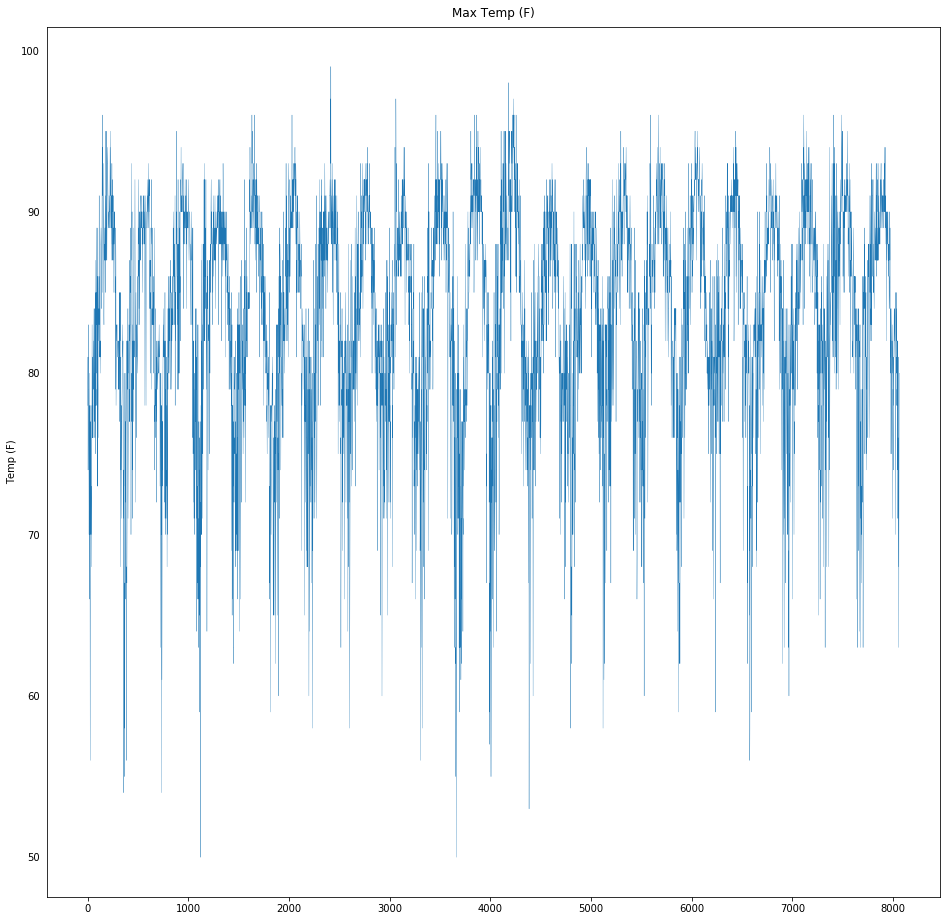

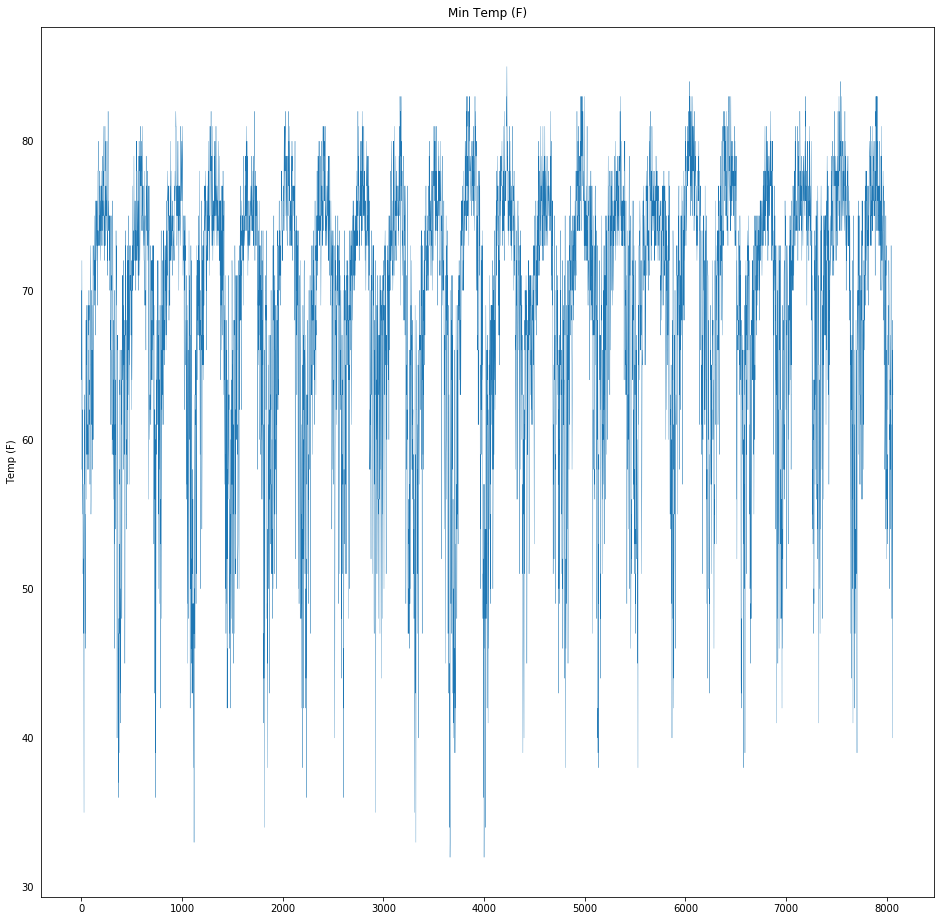

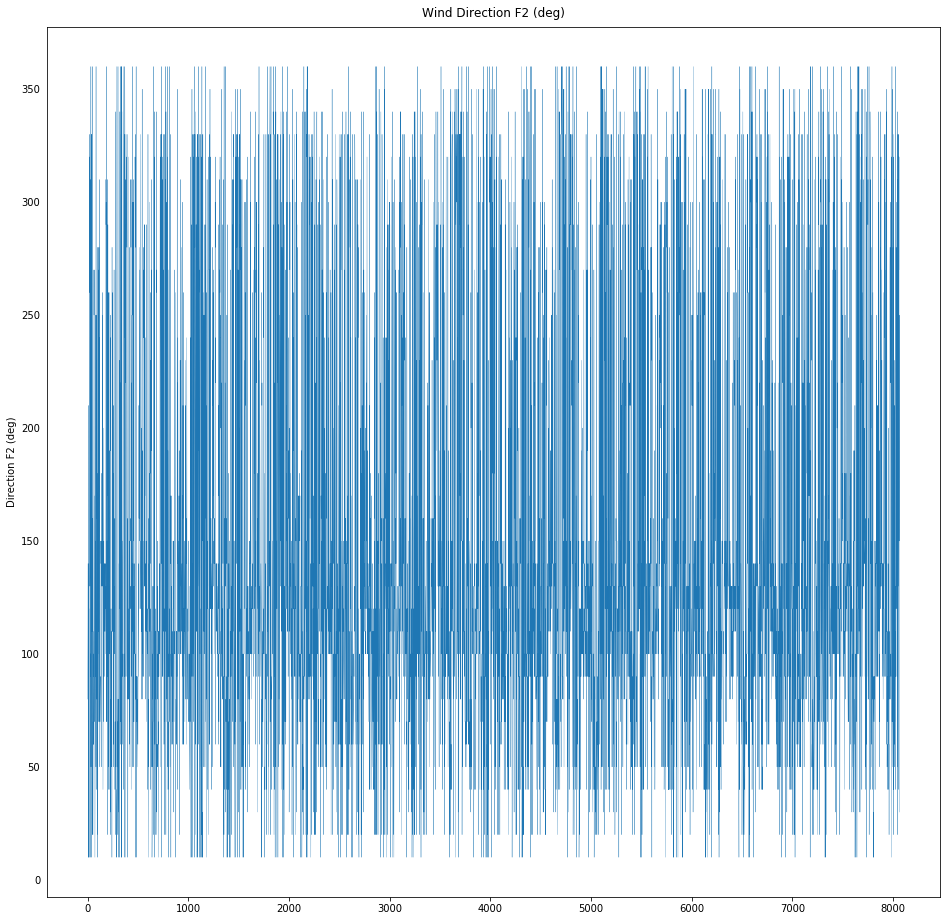

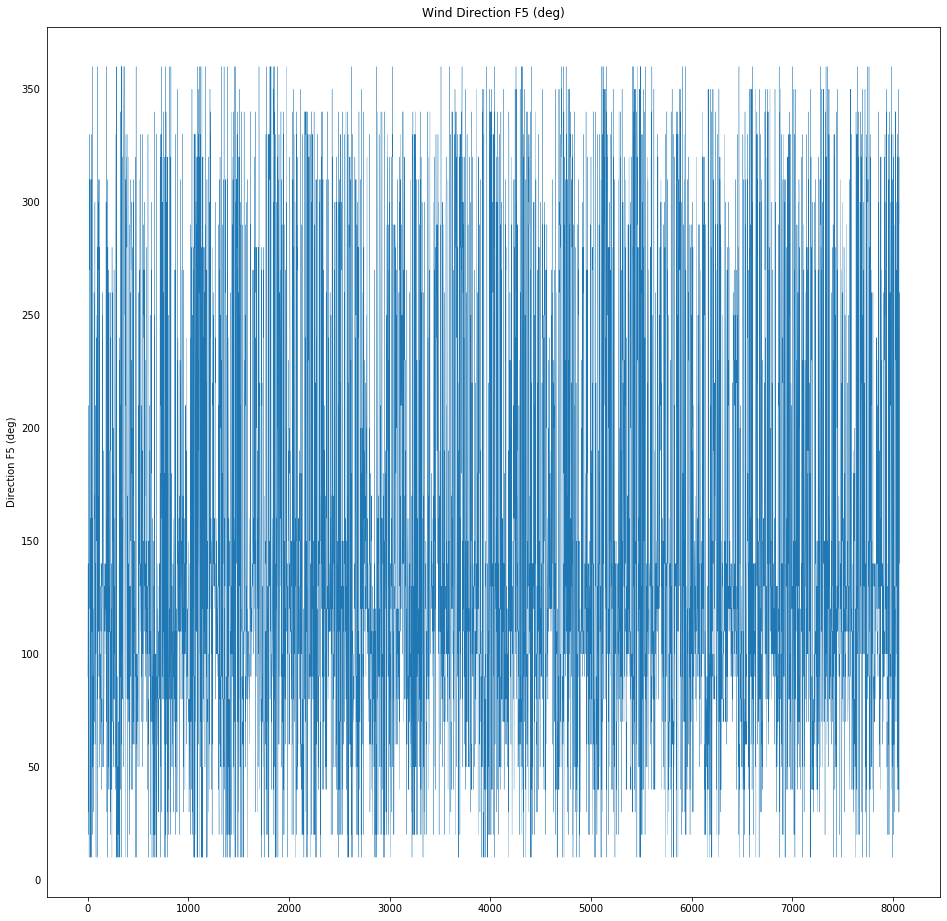

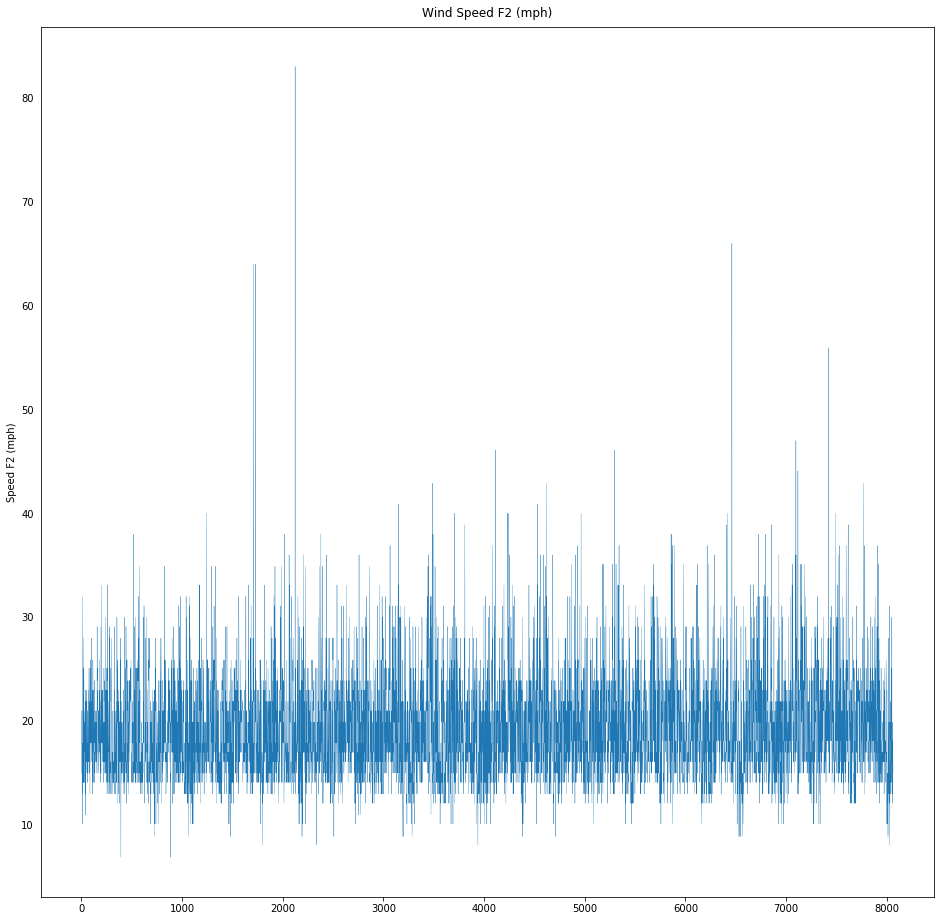

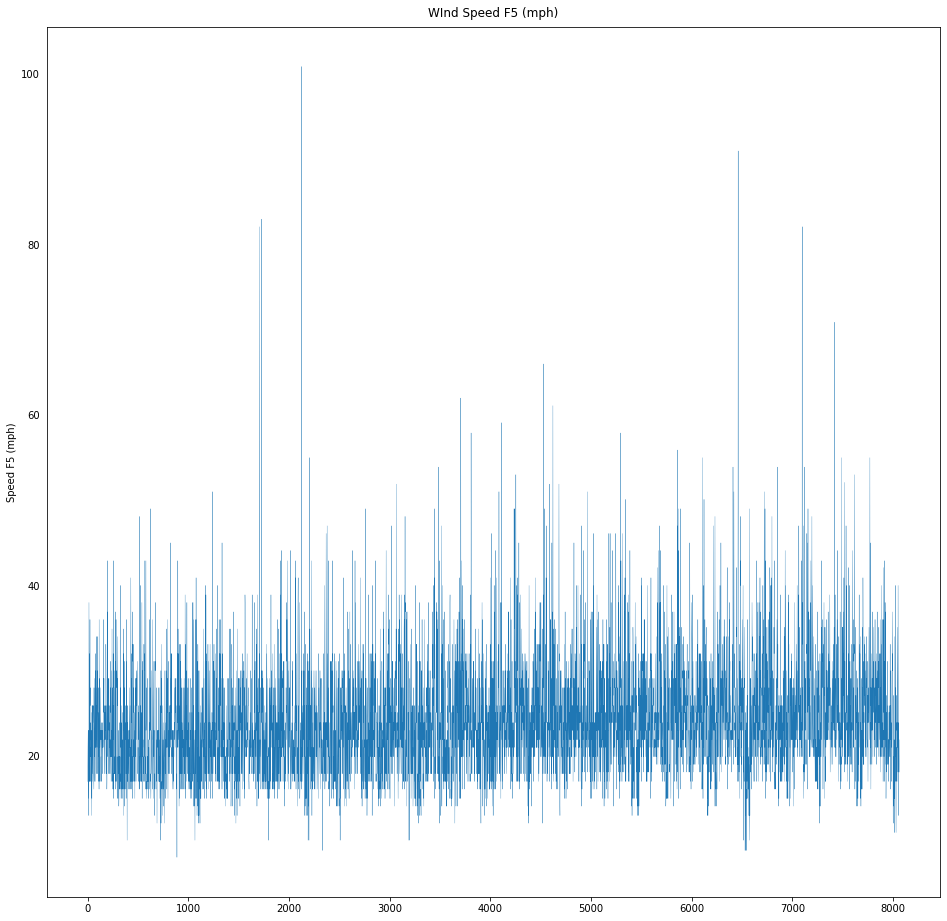

In [35]:
#Basic times series plots
columnNames = list(df.iloc[:,3:])
Xdata =np.array(df['DATE'])
for x in (columnNames):
    df[x].plot(linewidth=0.3)
    plt.title(metadict[x])
    plt.ylabel(metadictunits[x])
    plt.show()

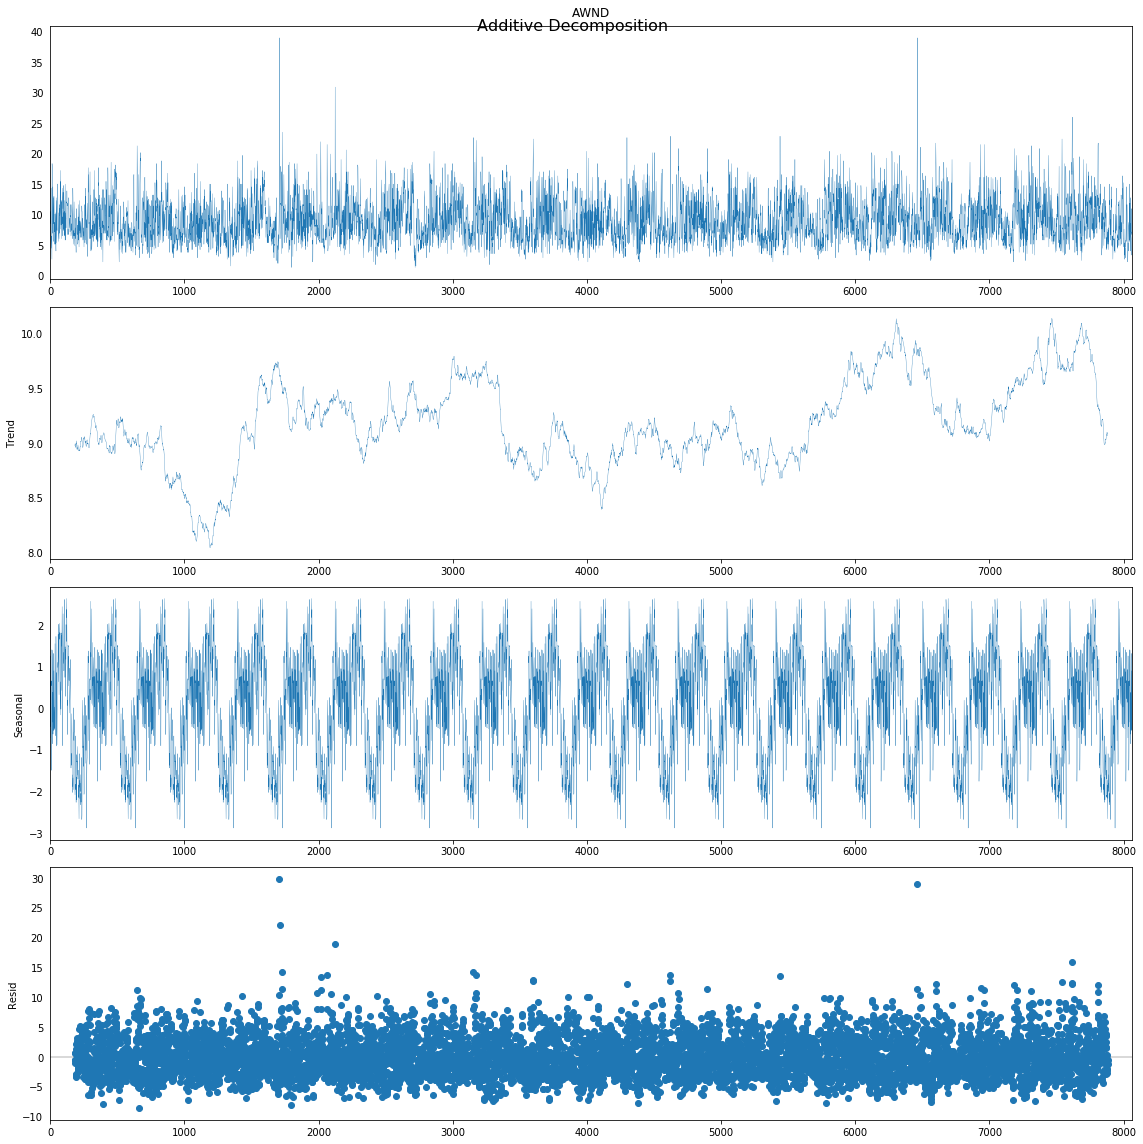

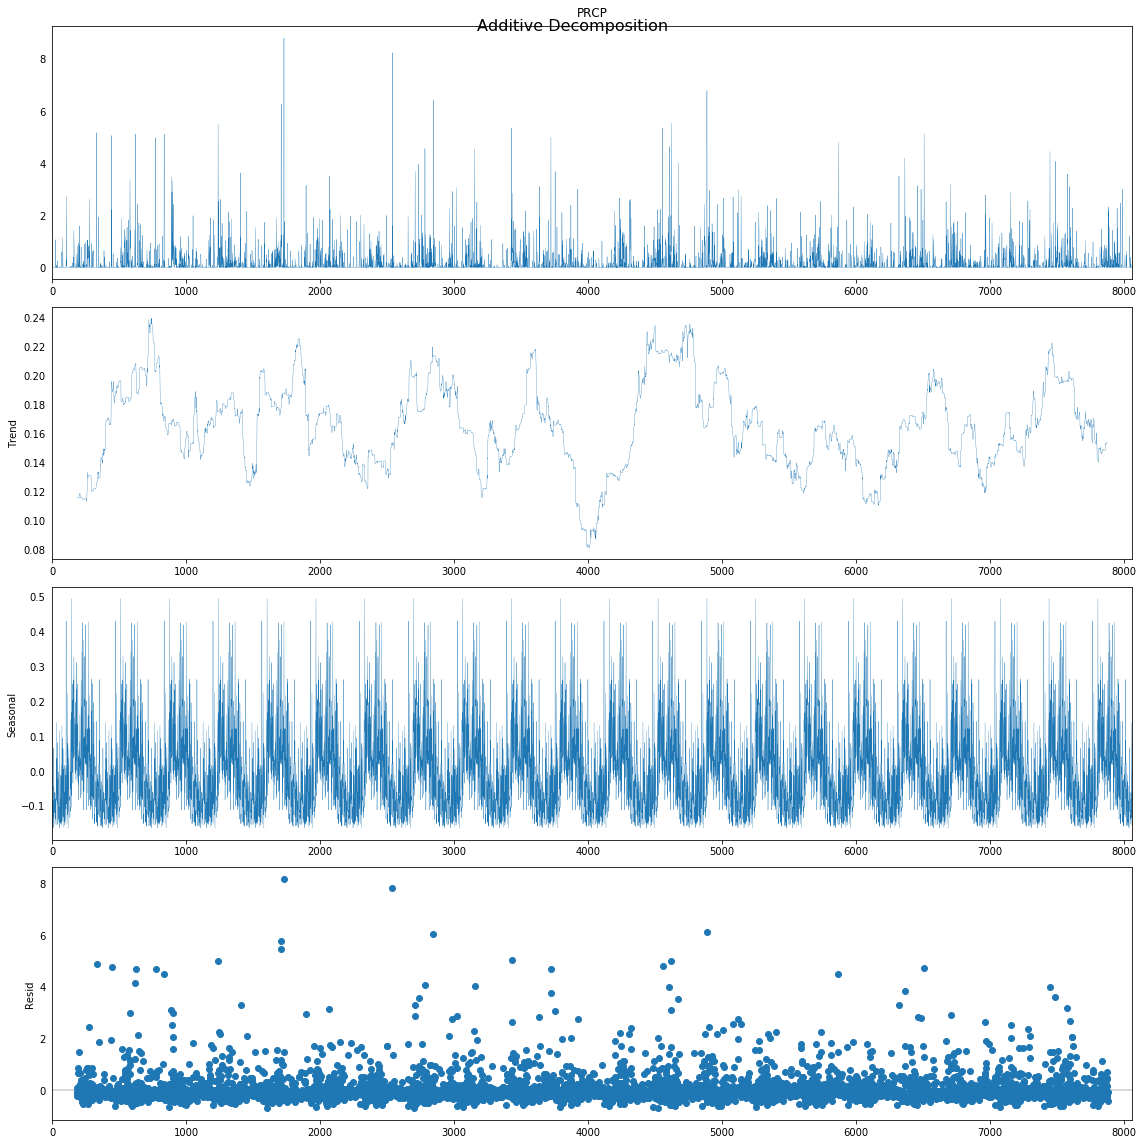

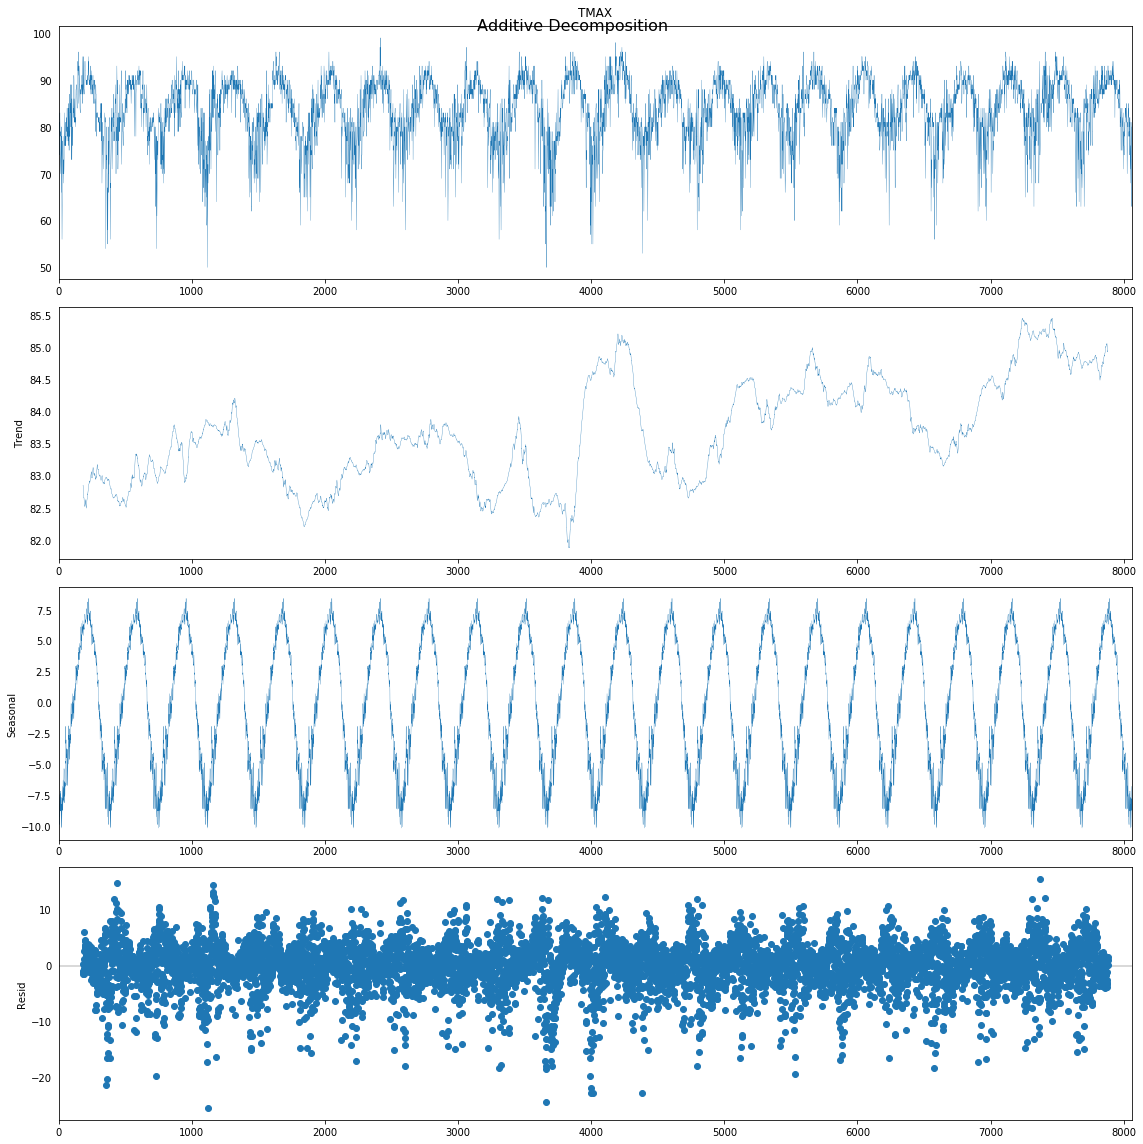

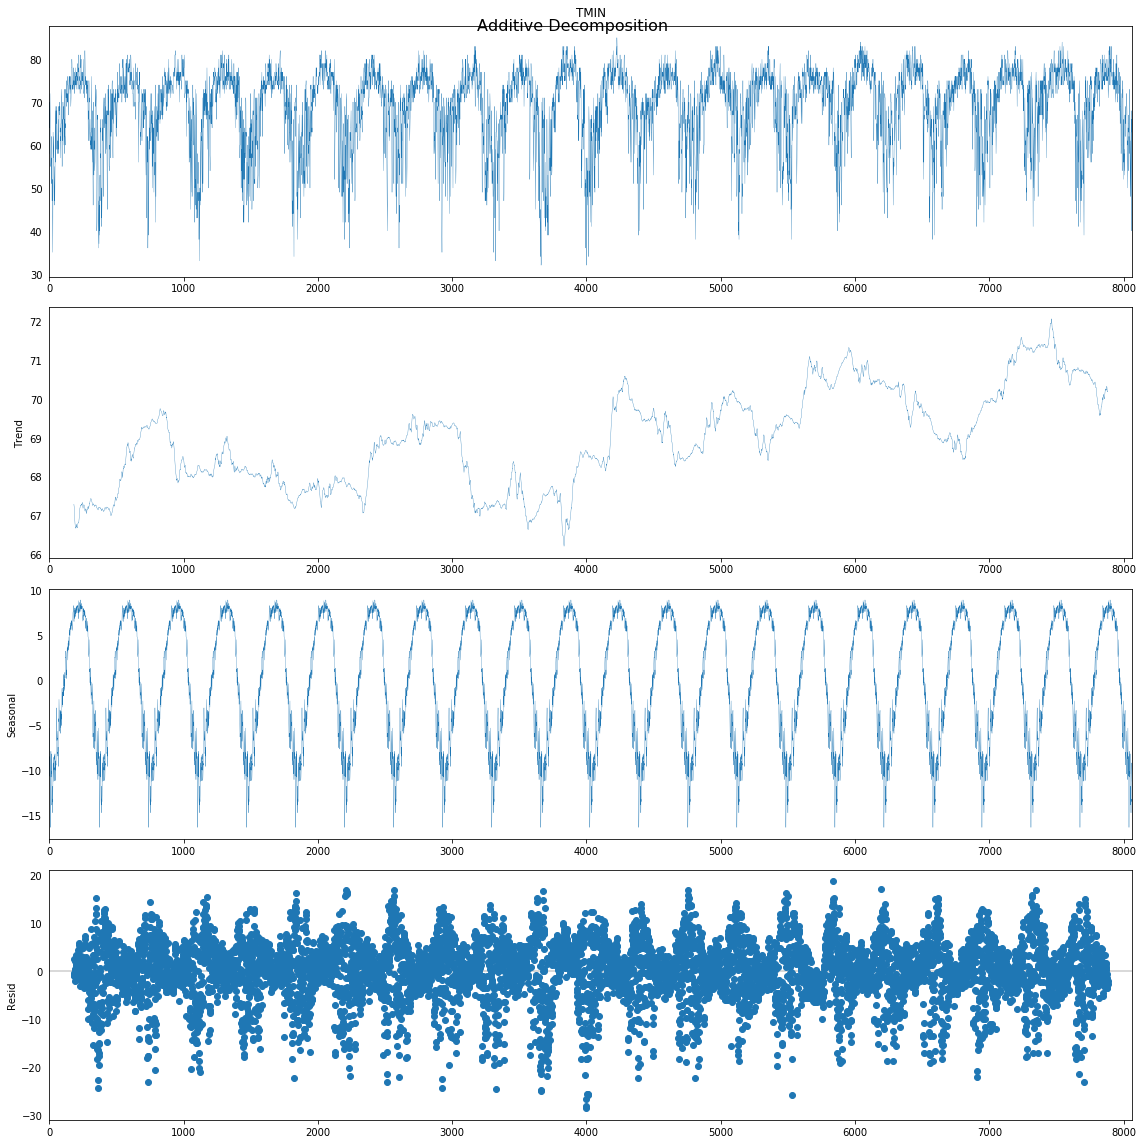

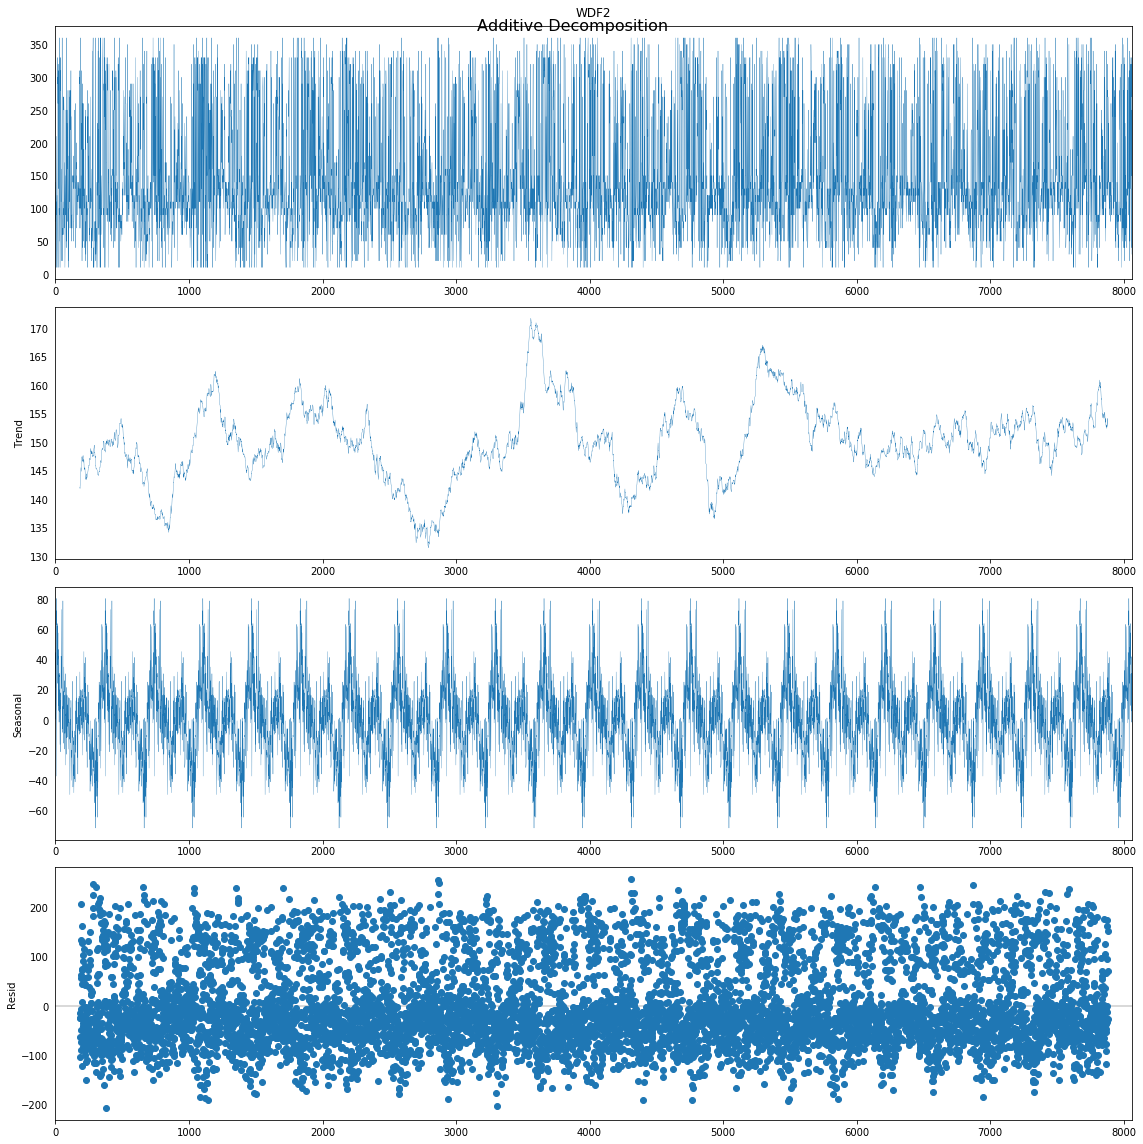

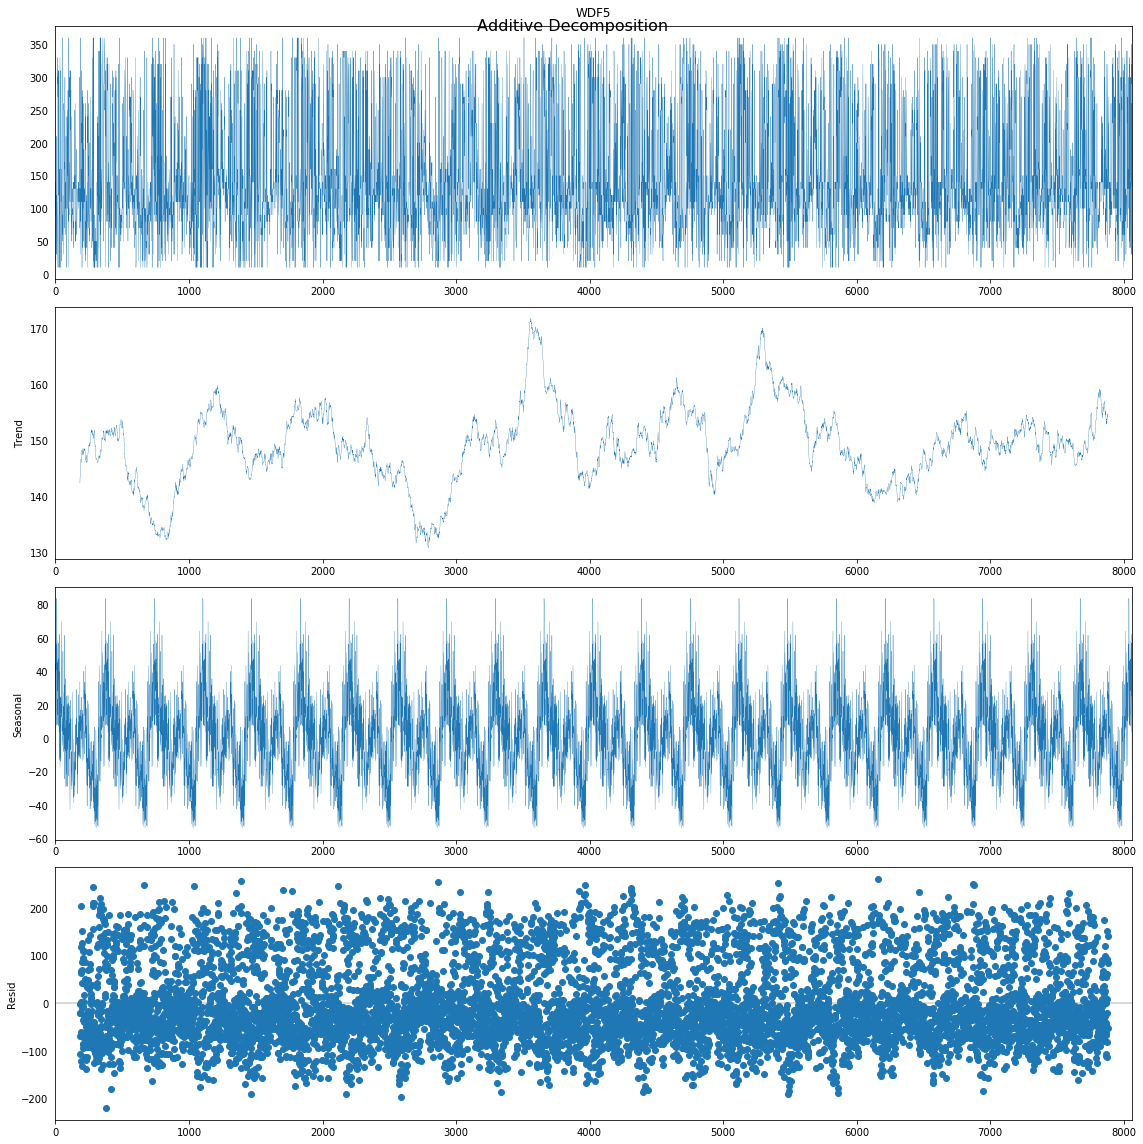

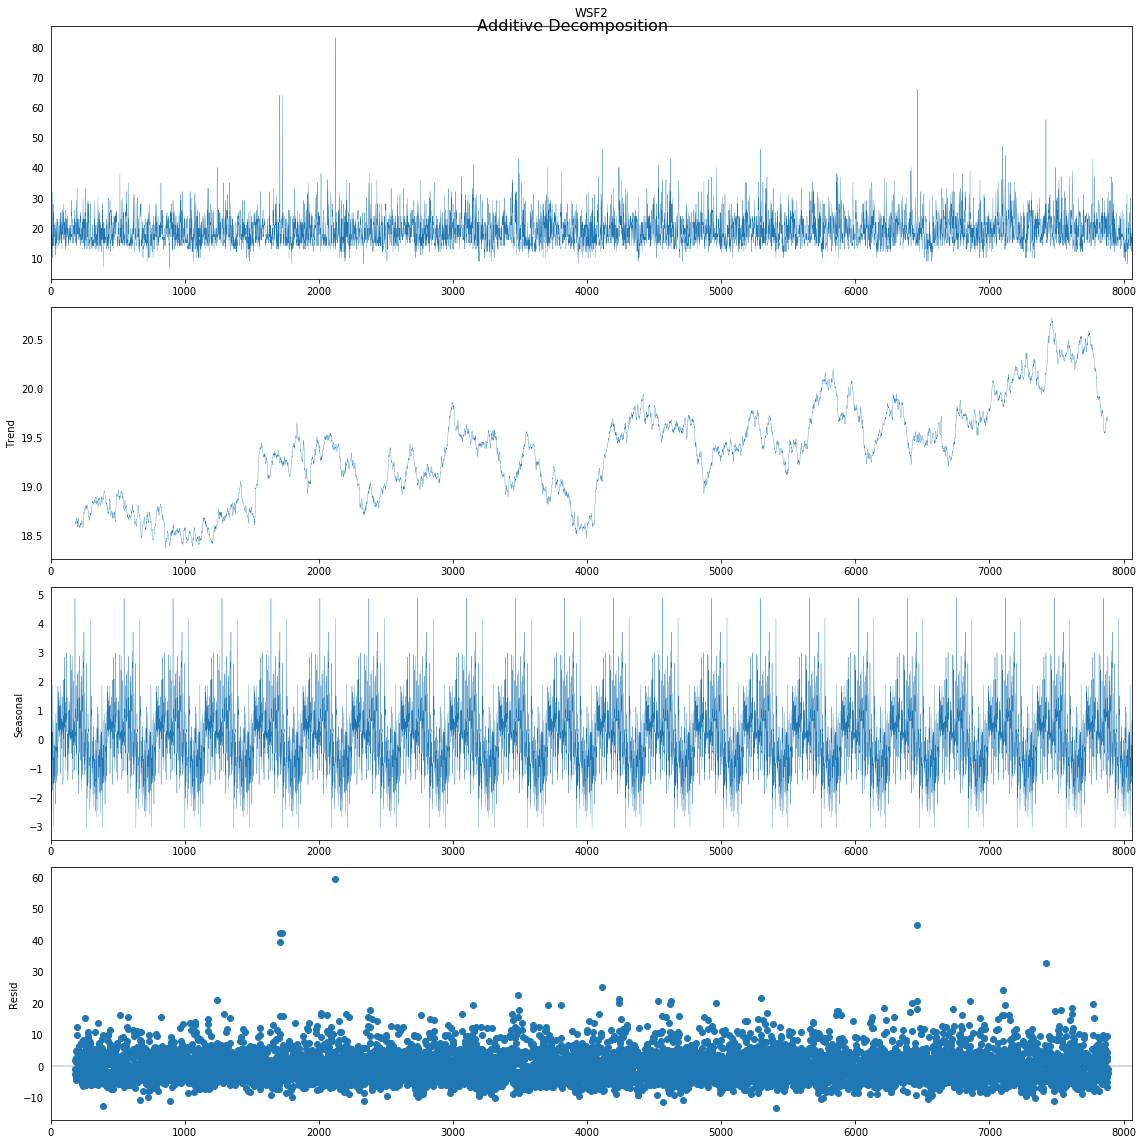

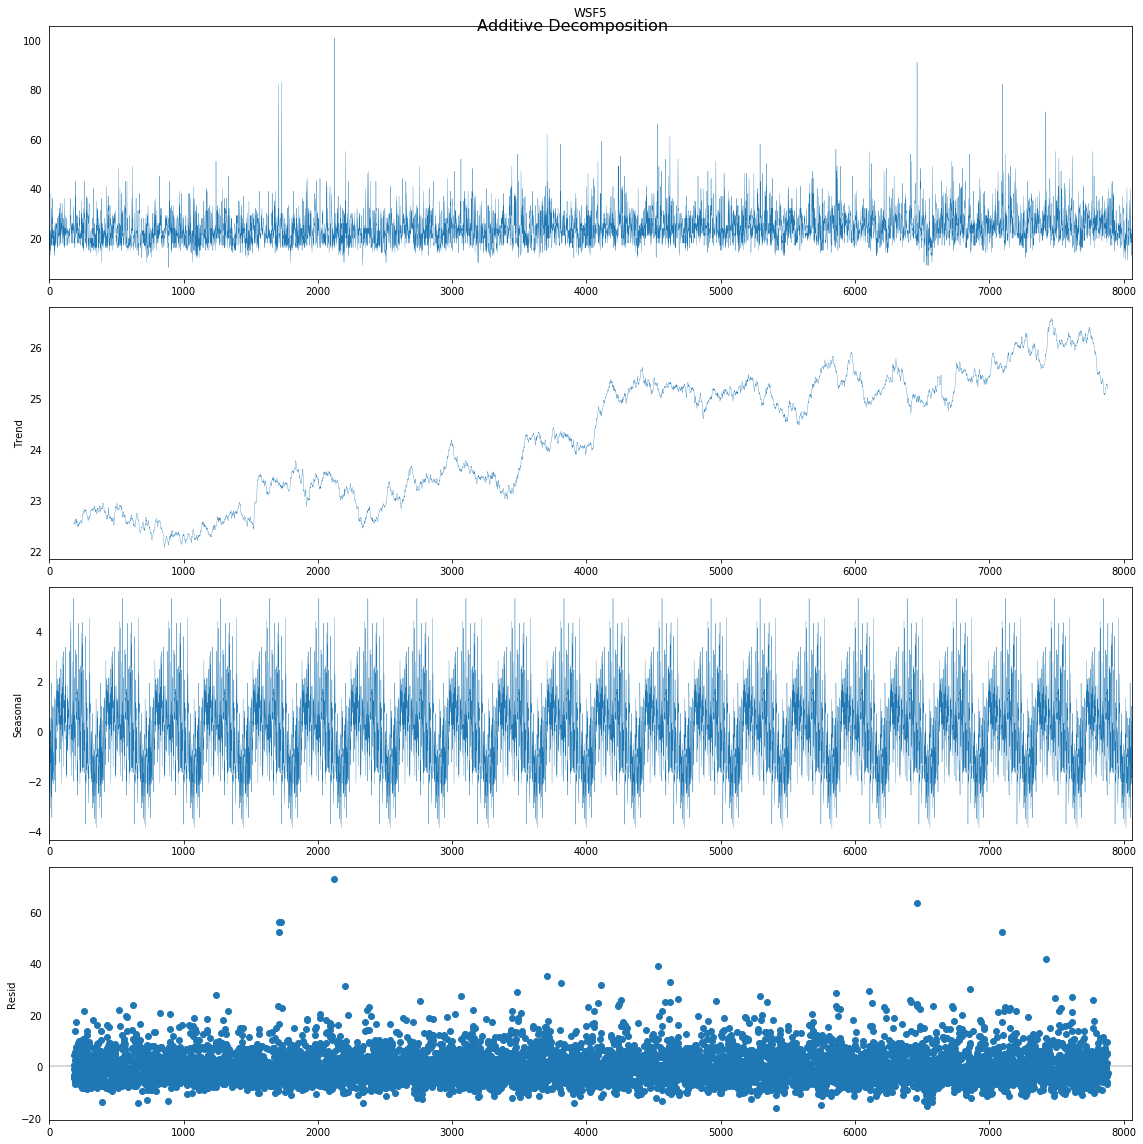

In [46]:
#Decompose time series as an additive multiplicative combination of the base level
rcParams['figure.figsize'] = 16, 16
rcParams['lines.linewidth'] = 0.3
#average 365 days of samples for trending
for x in (columnNames):
    additive_decomposition = seasonal_decompose(df[x], model='additive', period=365)
    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.show()

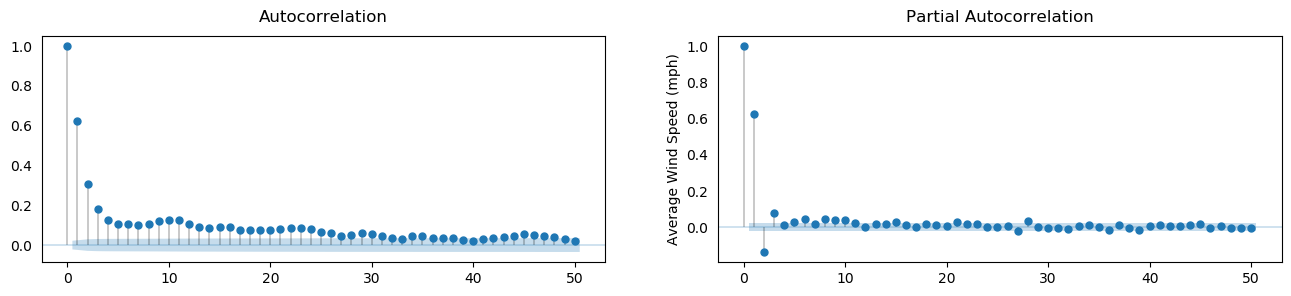

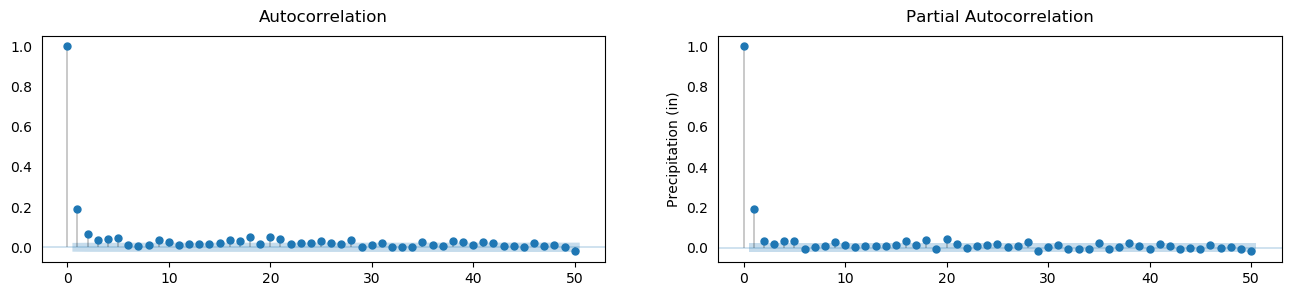

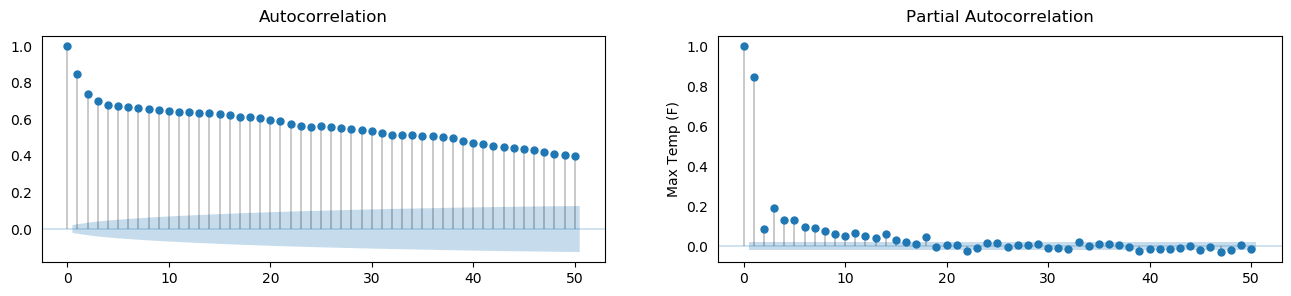

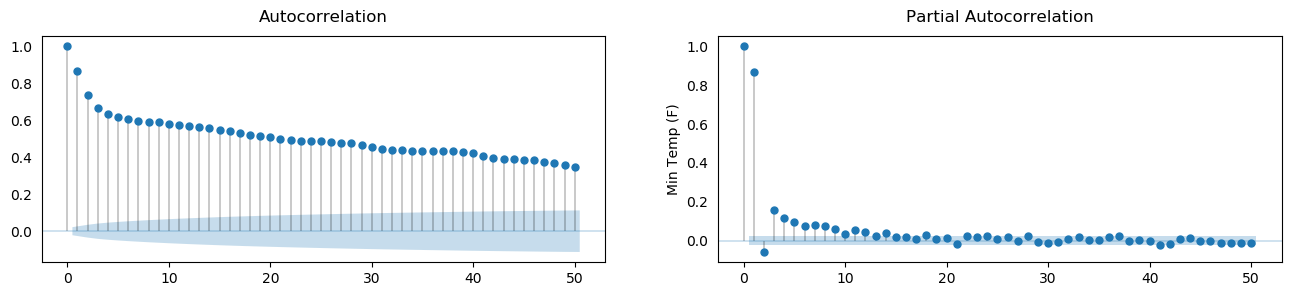

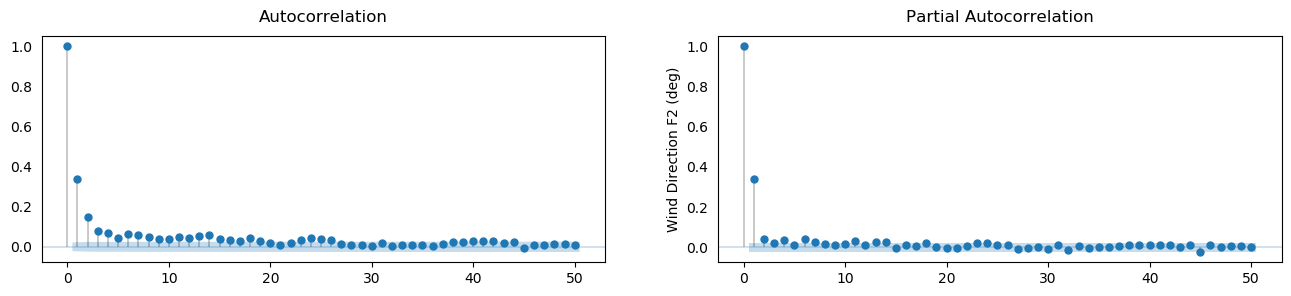

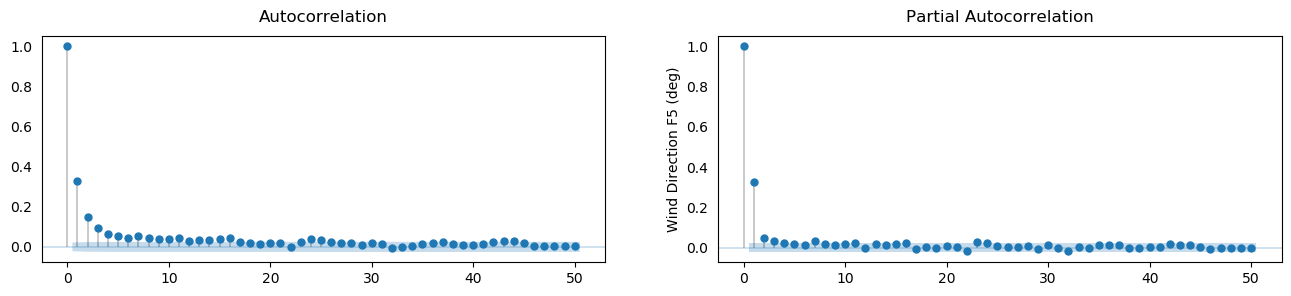

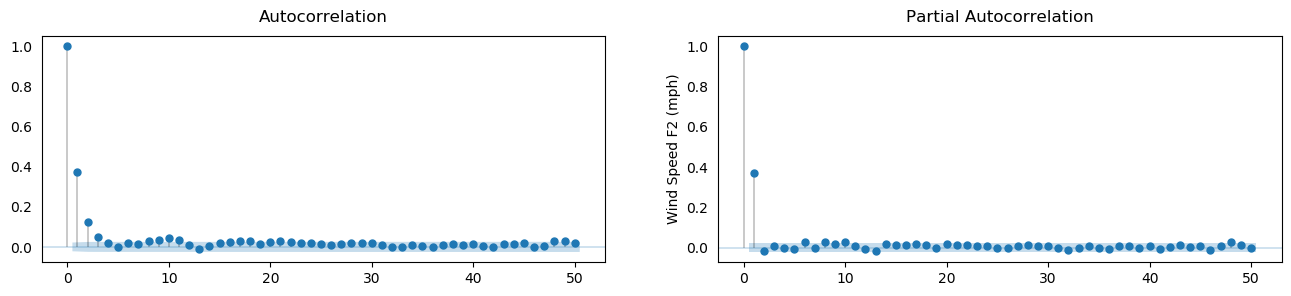

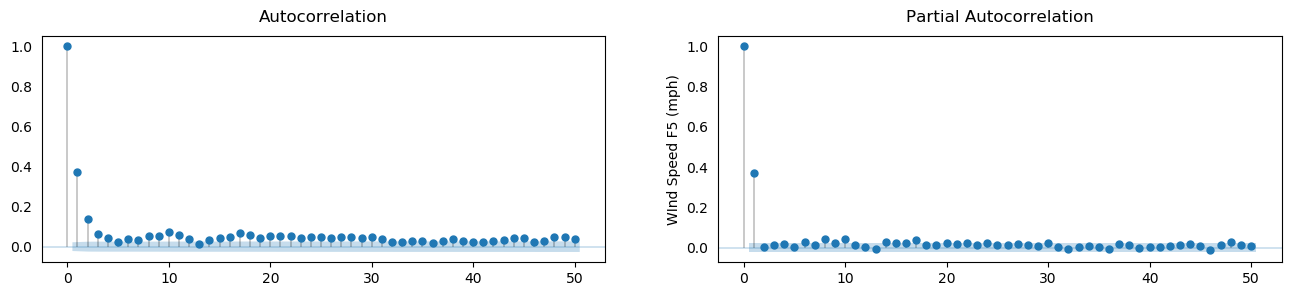

In [36]:
#Checking for any correlation. Autocorrelation, the previous values of the series (lags) may be helpful 
#in predicting the current value

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for x in (columnNames):
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plt.ylabel(metadict[x])
    plot_acf(df[x].tolist(), lags=50, ax=axes[0])
    plot_pacf(df[x].tolist(), lags=50, ax=axes[1])

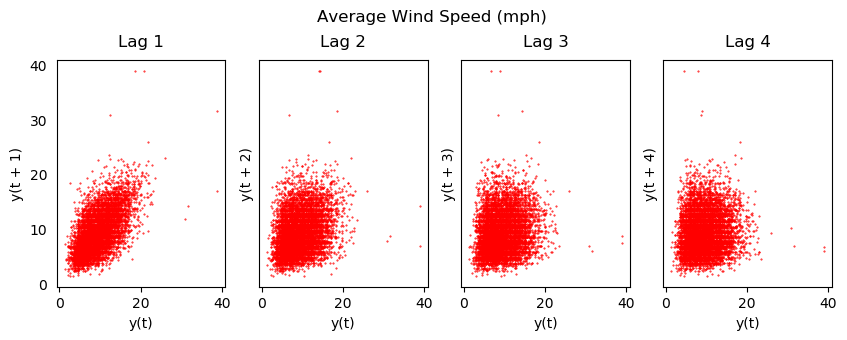

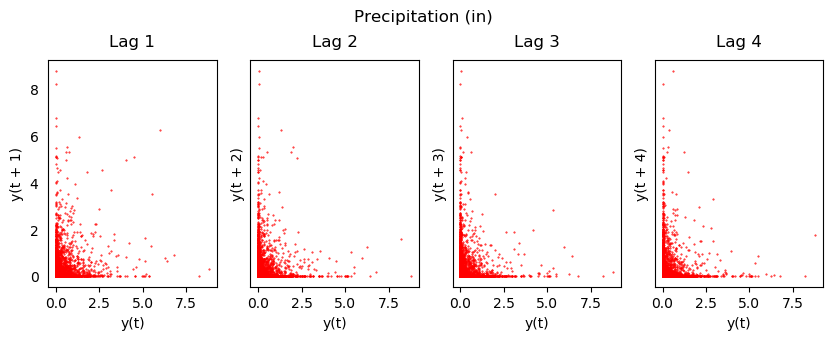

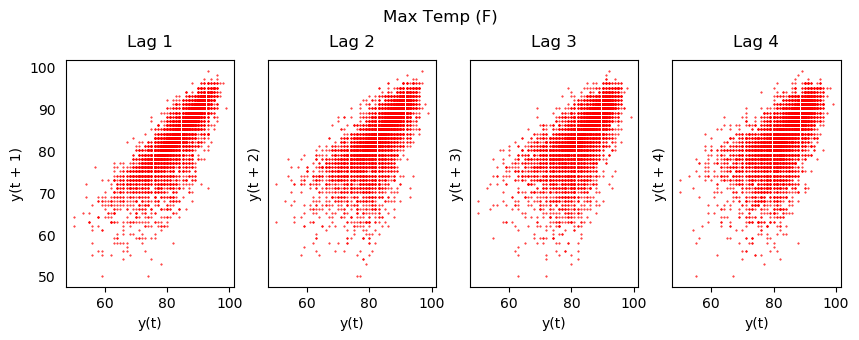

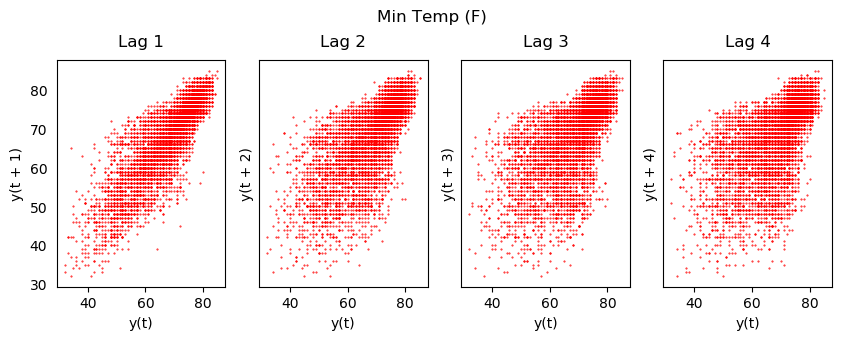

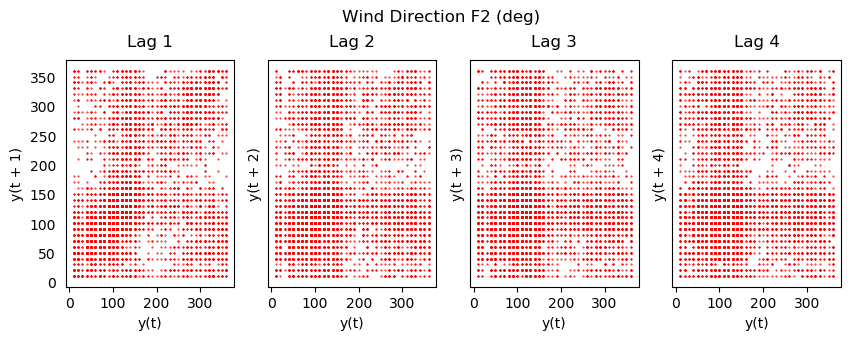

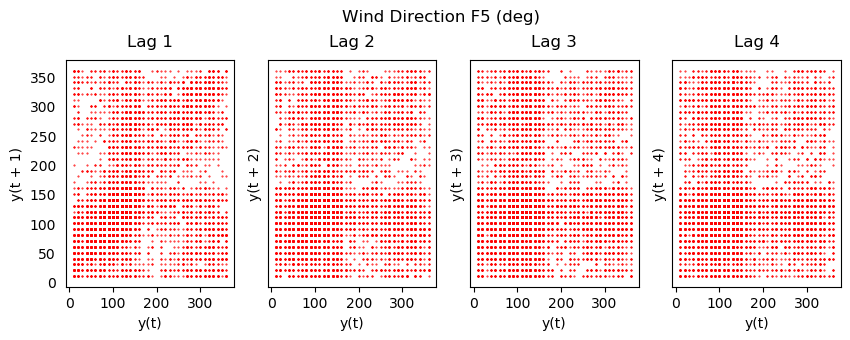

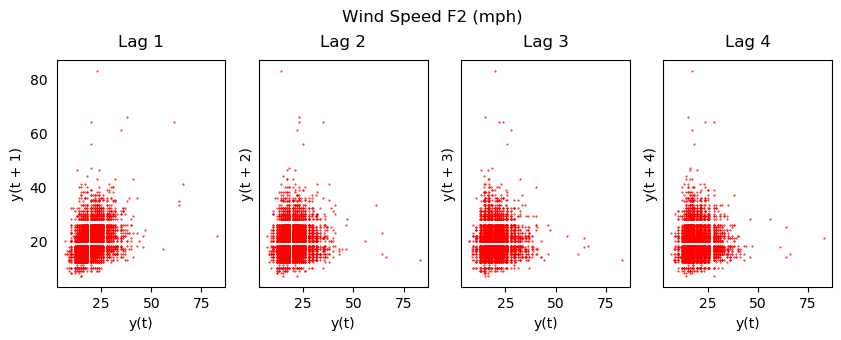

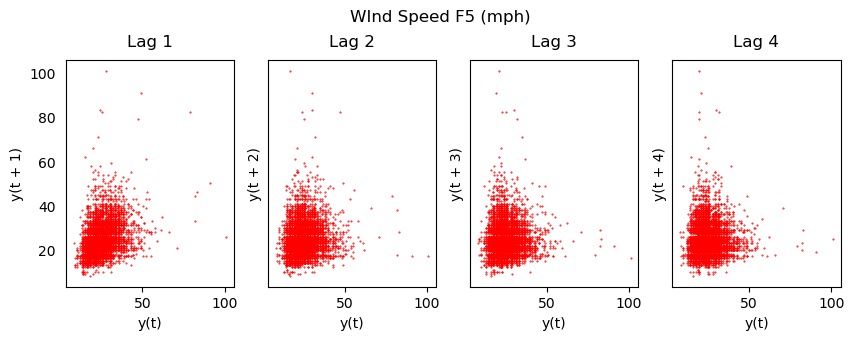

In [47]:
#Lag plots of each measument. Any pattern on the lag plots indicates autocorrelation. 
#Four next samples included on this analysis.
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


for x in (columnNames):
    fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
    for i, ax in enumerate(axes.flatten()[:4]):
        lag_plot(df[x], lag=i+1, ax=ax, c='red', s=0.2)
        ax.set_title('Lag ' + str(i+1))

    fig.suptitle((metadict[x]), y=1.05)    
    plt.show()